In [1]:
import pandas as pd
import plotly

# Read the CSV file
df = pd.read_excel('hbv_results.xlsx')  # Assuming tab-separated based on your image


In [2]:
df.head()

,Date,Qsim,Qobs,Precipitation,Temperature,AET,PET,Snow,Snowcover,SM,Recharge,SUZ,SLZ,Q0,Q1,Q2,Unnamed: 16,Unnamed: 17,calibration,SubCatchment_1
0,1981-01-15,0.104,0.103,0.1,21.9,0.24,0.24,0,0,348511.0,0.0,0.0,4.2,0.0,0.0,0.104,NaN,NaN,Water Balance [mm/year]:,NaN
1,1981-01-16,0.107,0.100,0.1,21.9,0.24,0.24,0,0,348510.8,0.0,0.0,4.1,0.0,0.0,0.107,NaN,NaN,Sum Qsim,289.465962
2,1981-01-17,0.110,0.099,0.0,21.9,0.24,0.24,0,0,348510.6,0.0,0.0,4.0,0.0,0.0,0.110,NaN,NaN,Sum Qobs,252.337962
3,1981-01-18,0.111,0.099,0.5,21.9,0.24,0.24,0,0,348510.7,0.1,0.0,4.0,0.0,0.0,0.111,NaN,NaN,Sum Precipitation,1148.833196
4,1981-01-19,0.111,0.096,0.5,21.9,0.24,0.24,0,0,348510.8,0.1,0.0,4.0,0.0,0.0,0.111,NaN,NaN,Sum AET,86.749800


In [3]:
# Import the model
from hbv_model import HBVModel
from calibration import calibrate_hbv_model  # function to do the calibration
import pandas as pd


# 1. Initialize the model
model = HBVModel()

# # 2. Load your data (either from file or DataFrame)
# # Read the data from pandas df
model.load_data(data=df,
               date_column='Date',
               precip_column='Precipitation',
               temp_column='Temperature',
               pet_column='PET',
               obs_q_column='Qobs')
# ,
#                start_date='1982-01-15',          # start date you want
#                end_date='1983-01-15' )  # if you have observed discharge




Time step detected: D
Loaded data with 9117 time steps, from 1981-01-15 00:00:00 to 2005-12-31 00:00:00


In [ ]:

custom_params = {
    'snow': {
        'TT': {'min': -2.0, 'max': 2.0, 'default': 0.0},      # Temperature threshold for snow/rain (°C)
        'CFMAX': {'min': 1.0, 'max': 6.0, 'default': 4},      # Degree-day factor (mm/°C/day)
        'PCF': {'min': 0, 'max': 1.5, 'default': 0.3},      # Precipitation correction factor (-)
        'SFCF': {'min': 0, 'max': 1.5, 'default': 0.3},     # Snowfall correction factor (-)
        'CFR': {'min': 0.0, 'max': 0.2, 'default': 0.05},     # Refreezing coefficient (-)
        'CWH': {'min': 0.0, 'max': 0.2, 'default': 0.1}       # Water holding capacity of snow (-)
    },
    'soil': {
        'FC': {'min': 50.0, 'max': 1000.0, 'default': 750.0},  # Field capacity (mm)
        'LP': {'min': 0.3, 'max': 1.0, 'default': 0.75},      # Limit for potential evaporation (-)
        'BETA': {'min': 1.0, 'max': 8.0, 'default': 3.0}      # Shape coefficient (-)
    },
    'response': {
        'K0': {'min': 0.01, 'max': 0.9, 'default': 0.12},      # Quick flow recession coefficient (1/day)
        'K1': {'min': 0.0005, 'max': 0.5, 'default': 0.05},     # Intermediate flow recession coefficient (1/day)
        'K2': {'min': 0.0005, 'max': 0.5, 'default': 0.05},     # Baseflow recession coefficient (1/day)
        'UZL': {'min': 5.0, 'max': 50.0, 'default': 28.0},    # Upper zone threshold (mm)
        'PERC': {'min': 0.03, 'max': 8.0, 'default': 0.25}     # Percolation rate (mm/day)
    }
}
model.set_parameters(custom_params)

#4. Set initial conditions (optional - uses defaults if not set)
model.set_initial_conditions(
    snowpack=0,  #initial snowpack (mm)
    liquid_water=0,    # Initial liquid water in snow (mm)
    soil_moisture= 650,  # Initial soil moisture (mm)
    upper_storage=30,   # Initial upper zone storage (mm)
    lower_storage=30, ) # Initial lower zone storage (mm)

# 5. Run the model
results = model.run()

Initial conditions updated.
Starting model run for 9117 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.793
KGE: 0.749
PBIAS: 2.7%
Correlation: 0.900


In [31]:
#6. Visualize results
#model.plot_results(output_file='fig.png')

# #7. Save results to CSV (optional)
# model.save_results("hbv_simulation_results.csv")

Starting calibration using SLSQP method...
Optimizing RMSE with 14 parameters and 500000000 iterations
Starting model run for 9117 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.804
KGE: 0.755
PBIAS: 2.3%
Correlation: 0.907
Starting model run for 9117 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.804
KGE: 0.755
PBIAS: 2.3%
Correlation: 0.907
Starting model run for 9117 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.804
KGE: 0.755
PBIAS: 2.3%
Correlation: 0.907
Starting model run for 9117 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.804
KGE: 0.755
PBIAS: 2.3%
Correlation: 0.907
Starting model run for 9117 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.804
KGE: 0.755
PBIAS: 2.3%
Correlation: 0.907
Starting model run for 9117 time steps...
Model run completed successfully!
Performance metr

c:\Users\abdal\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Model run completed successfully!
Performance metrics calculated:
NSE: 0.813
KGE: 0.779
PBIAS: 7.7%
Correlation: 0.909
Starting model run for 9117 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.813
KGE: 0.779
PBIAS: 7.7%
Correlation: 0.909
Starting model run for 9117 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.813
KGE: 0.779
PBIAS: 7.7%
Correlation: 0.909
Starting model run for 9117 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.813
KGE: 0.779
PBIAS: 7.7%
Correlation: 0.909
Starting model run for 9117 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.813
KGE: 0.779
PBIAS: 7.7%
Correlation: 0.909
Starting model run for 9117 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.813
KGE: 0.779
PBIAS: 7.7%
Correlation: 0.909
Starting model run for 9117 time steps...
Model run completed successfully!


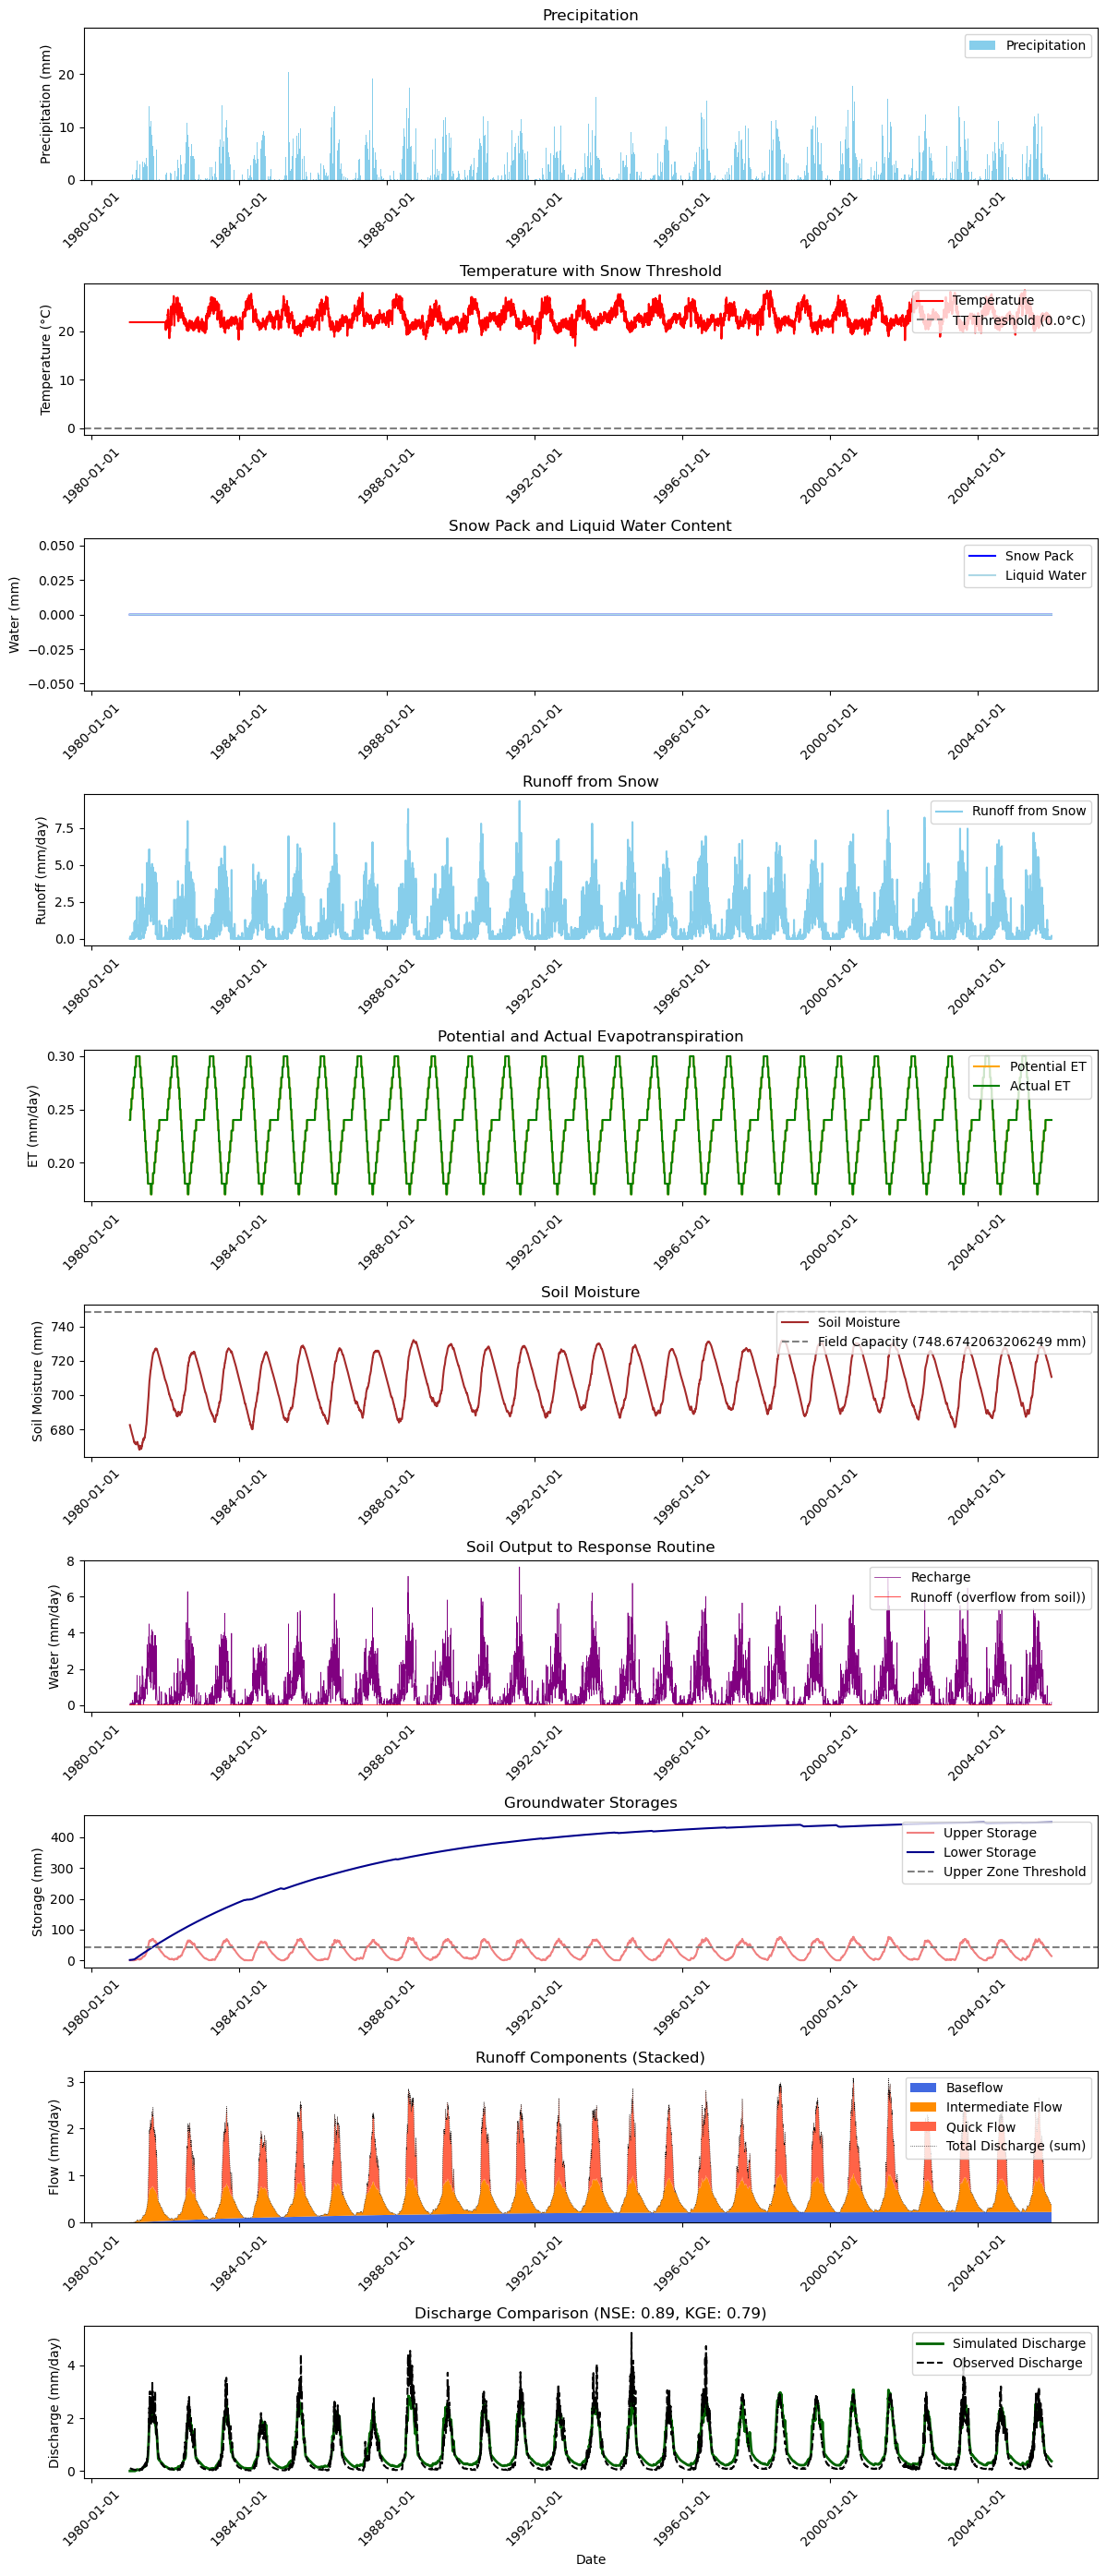

In [32]:
results = calibrate_hbv_model(
    model,
    method='SLSQP',     # Optimization algorithm
    objective='RMSE',    # Objective function to optimize
    iterations=500000000,     # Maximum iterations
    verbose=True,       # Print progress
    plot_results=True   # Plot results after calibration
)

# The model now has calibrated parameters
# You can access them via model.params

# You can also access the calibration results
optimized_params = results['parameters']
performance = results['performance']
optimization_details = results['optimization_result']


In [33]:
model.params

{'soil': {'FC': {'min': 50.0, 'max': 1000.0, 'default': 748.6742063206249},
  'LP': {'min': 0.3, 'max': 1.0, 'default': 0.75},
  'BETA': {'min': 1.0, 'max': 5.0, 'default': 4.9999996318771185}},
 'snow': {'TT': {'min': -2.0, 'max': 2.0, 'default': 0.0},
  'CFMAX': {'min': 1.0, 'max': 6.0, 'default': 4.0},
  'PCF': {'min': 0, 'max': 1.5, 'default': 0.3409291022547081},
  'SFCF': {'min': 0, 'max': 1.5, 'default': 0.3},
  'CFR': {'min': 0.0, 'max': 0.2, 'default': 0.05},
  'CWH': {'min': 0.0, 'max': 0.2, 'default': 0.1}},
 'response': {'K0': {'min': 0.01, 'max': 0.9, 'default': 0.05466449260163471},
  'K1': {'min': 0.0005, 'max': 0.5, 'default': 0.010509422712247666},
  'K2': {'min': 0.0005, 'max': 0.5, 'default': 0.00050000018076373},
  'UZL': {'min': 5.0, 'max': 50.0, 'default': 41.952083966496254},
  'PERC': {'min': 0.03, 'max': 8.0, 'default': 0.23169501871868795}}}

In [25]:
performance

{'NSE': 0.8776736645785974,
 'KGE': 0.7921013042201777,
 'PBIAS': 12.17450493056876,
 'r': 0.9480016156277585}